# 01 Pengenalan Obspy dan Pengolahan Sinyal Sederhana

Pemrosesan data akan dibantu oleh *library* `Obspy` yang lengkap dan sudah umum digunakan untuk pengolahan data seismik berbasis Python. Sebelum memulai pengolahan kita harus mengintegrasikan lagi Google Drive:

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


Kemudian menginstall `obspy` dengan perintah:

In [2]:
!pip install obspy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 14.3 MB 4.3 MB/s 


Tekan `RESTART RUNTIME` agar `obspy` dapat terbaca di *runtime*

## 1 Membaca Data

`obspy` dapat membaca berbagai jenis format data ataupun metadata, untuk membaca data kita dapat menggunakan fungsi `read`:

In [1]:
from obspy import read

st=read('/content/drive/MyDrive/BMKG_Akselerometer/event-sundastrait-20210321/ASJR_E.mseed')
print(st)

1 Trace(s) in Stream:
IA.ASJR.00.HNE | 2021-03-21T05:56:43.000000Z - 2021-03-21T06:31:43.000000Z | 100.0 Hz, 210001 samples


Data rekaman yang dibaca `obspy` akan disimpan dalam bentuk objek `Stream` di memori, struktur objek ini adalah seperti pada gambar di bawah ini:

![struktur stream](https://docs.obspy.org/_images/Stream_Trace.png)

Pada contoh di atas tertulis bahwa terdapat 1 `Trace` dalam `Stream`, `Trace` merupakan objek data 1 komponen sedangkan `Stream` merupakan object data 1 stasiun sehingga 1 `Stream` bisa terdiri atas banyak `Trace`. Data yang sudah terbaca terdiri atas 1 komponen saja. Kita dapat mengeplot data menggunakan:

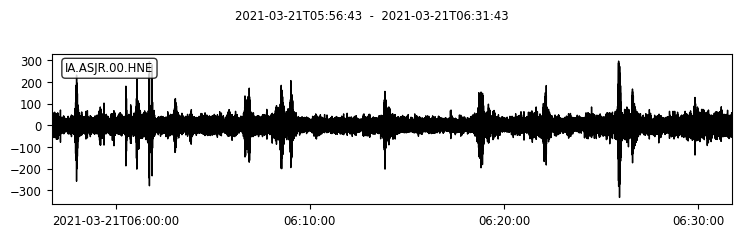

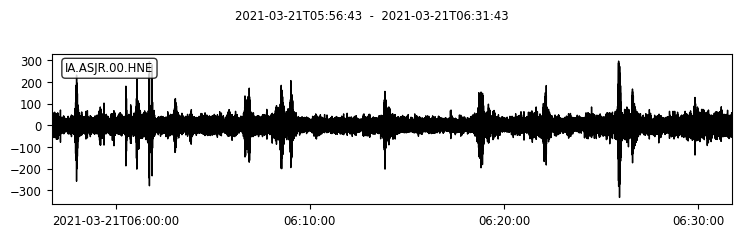

In [2]:
st.plot()

Dalam object `Stream` informasi mengenai parameter rekaman seperti `sampling_rate` dan yang lain tersimpan dalam masing-masing `Trace`. `Trace` dapat diambil dengan menggunakan indeks:

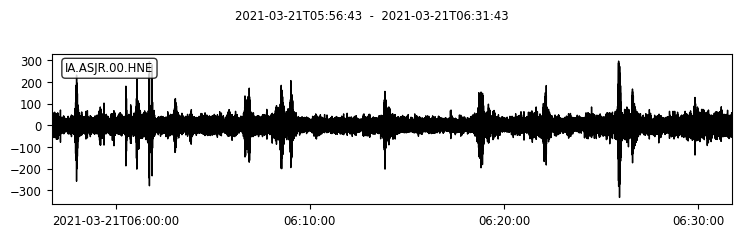

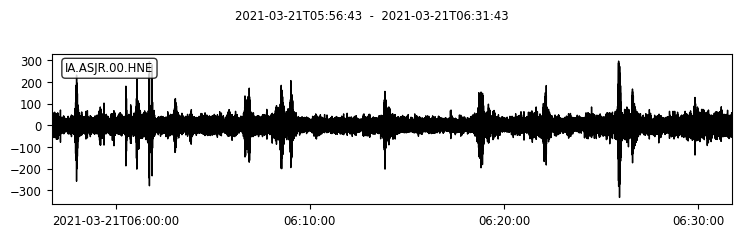

In [4]:
tr1 = st[0] #index 0 untuk Trace pertama
tr1.plot()

Informasi parameter perekaman dapat diakses menggunakan `Trace.stats`:

In [5]:
tr1.stats

         network: IA
         station: ASJR
        location: 00
         channel: HNE
       starttime: 2021-03-21T05:56:43.000000Z
         endtime: 2021-03-21T06:31:43.000000Z
   sampling_rate: 100.0
           delta: 0.01
            npts: 210001
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'R', 'number_of_records': 517, 'encoding': 'STEIM1', 'byteorder': '>', 'record_length': 512, 'filesize': 264704})

## 2 Menggabungkan Data

Data dalam setiap komponen E, N, dan Z dapat digabungkan dalam 1 `Stream` sehingga nantinya 1 `Stream` terdiri atas 3 `Trace`:

In [6]:
st=read('/content/drive/MyDrive/BMKG_Akselerometer/event-sundastrait-20210321/ASJR_Z.mseed')
st+=read('/content/drive/MyDrive/BMKG_Akselerometer/event-sundastrait-20210321/ASJR_N.mseed')
st+=read('/content/drive/MyDrive/BMKG_Akselerometer/event-sundastrait-20210321/ASJR_E.mseed')
print(st)

3 Trace(s) in Stream:
IA.ASJR.00.HNZ | 2021-03-21T05:56:43.000000Z - 2021-03-21T06:31:43.000000Z | 100.0 Hz, 210001 samples
IA.ASJR.00.HNN | 2021-03-21T05:56:43.000000Z - 2021-03-21T06:31:43.000000Z | 100.0 Hz, 210001 samples
IA.ASJR.00.HNE | 2021-03-21T05:56:43.000000Z - 2021-03-21T06:31:43.000000Z | 100.0 Hz, 210001 samples


Dari hasil menjalankan perintah di atas kita mendapatkan 1 `Stream` dengan 3 komponen (`Trace`).

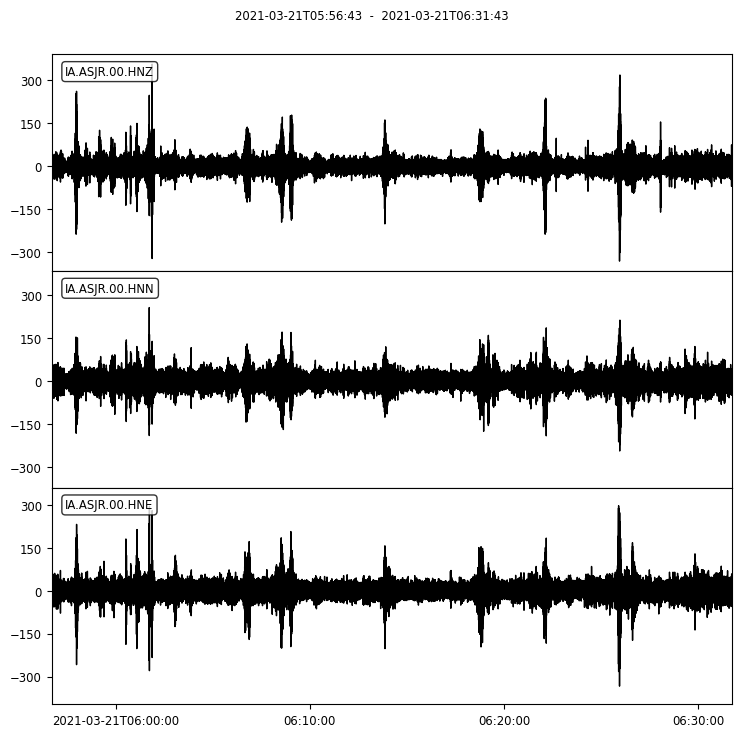

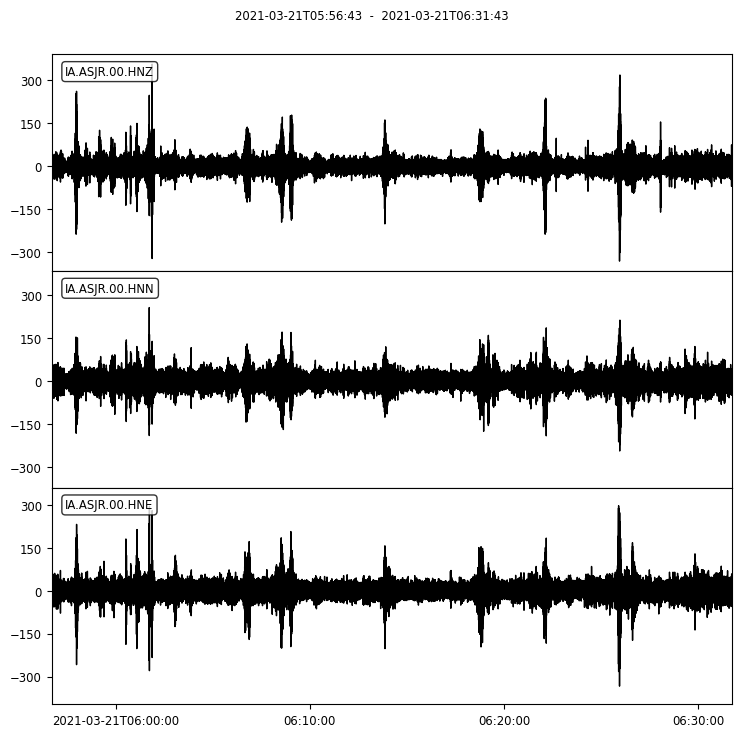

In [7]:
st.plot()

seperti contoh sebelumnya, kita juga dapat mengakses `Trace` tertentu menggunakan indeks, contoh apabila ingin mengakses `Trace` kedua (indeks 1 karena mulai dari 0)

In [8]:
tr2 = st[1]
print(tr2.stats)

         network: IA
         station: ASJR
        location: 00
         channel: HNN
       starttime: 2021-03-21T05:56:43.000000Z
         endtime: 2021-03-21T06:31:43.000000Z
   sampling_rate: 100.0
           delta: 0.01
            npts: 210001
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'R', 'number_of_records': 513, 'encoding': 'STEIM1', 'byteorder': '>', 'record_length': 512, 'filesize': 262656})


Jika informasi parameter rekaman dapat diambil dari `Trace.stats` maka informasi yang berisi data rekaman dapat diakses dengan `Trace.data`:

In [9]:
tr2.data

array([ -4,  -4,   0, ..., -11,   3,  -1], dtype=int32)

Sehingga bisa kita plot data dengan cara yang lain misalkan dengan bantuan `matplotlib`:

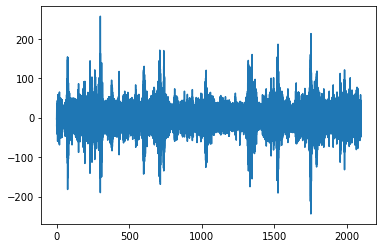

In [10]:
import matplotlib.pyplot as plt

data = tr2.data
waktu = tr2.times()

plt.plot(waktu, data)

## 3 Melakukan pengolahan sinyal sederhana

`obspy` sudah melengkapi `Stream` dengan berbagai fungsi untuk memodifikasi data, kita dapat melihat fungsi (`method`) apa saja yang didukung oleh `obspy` dalam `Stream` dengan:

In [11]:
help(st)

Help on Stream in module obspy.core.stream object:

class Stream(builtins.object)
 |  Stream(traces=None)
 |  
 |  List like object of multiple ObsPy :class:`~obspy.core.trace.Trace`
 |  objects.
 |  
 |  :type traces: list of :class:`~obspy.core.trace.Trace`, optional
 |  :param traces: Initial list of ObsPy :class:`~obspy.core.trace.Trace`
 |      objects.
 |  
 |  .. rubric:: Basic Usage
 |  
 |  >>> trace1 = Trace()
 |  >>> trace2 = Trace()
 |  >>> stream = Stream(traces=[trace1, trace2])
 |  >>> print(stream)  # doctest: +ELLIPSIS
 |  2 Trace(s) in Stream:
 |  ...
 |  
 |  .. rubric:: Supported Operations
 |  
 |  ``stream = streamA + streamB``
 |      Merges all traces within the two Stream objects ``streamA`` and
 |      ``streamB`` into the new Stream object ``stream``.
 |      See also: :meth:`Stream.__add__`.
 |  ``stream += streamA``
 |      Extends the Stream object ``stream`` with all traces from ``streamA``.
 |      See also: :meth:`Stream.__iadd__`.
 |  ``len(stream)``
 

### 3.1 Melakukan Pemotongan Data (*Trimming*)

Pemotongan `Stream` dan `Trace` dapat dilakukan dengan perintah `trim`, kita dapat melilhat parameter yang diperlukan dalam proses `trim`:

In [12]:
help(st.trim)

Help on method trim in module obspy.core.stream:

trim(starttime=None, endtime=None, pad=False, nearest_sample=True, fill_value=None) method of obspy.core.stream.Stream instance
    Cut all traces of this Stream object to given start and end time.
    
    :type starttime: :class:`~obspy.core.utcdatetime.UTCDateTime`, optional
    :param starttime: Specify the start time.
    :type endtime: :class:`~obspy.core.utcdatetime.UTCDateTime`, optional
    :param endtime: Specify the end time.
    :type pad: bool, optional
    :param pad: Gives the possibility to trim at time points outside the
        time frame of the original trace, filling the trace with the
        given ``fill_value``. Defaults to ``False``.
    :type nearest_sample: bool, optional
    :param nearest_sample: If set to ``True``, the closest sample is
        selected, if set to ``False``, the inner (next sample for a
        start time border, previous sample for an end time border) sample
        containing the time is s

Misalkan akan dilakukan pemotongan pada 2 detik pertama, maka sebelumnya kita bisa memberikan batas waktu tersebut. Dalam `obspy` waktu diwakili oleh objek `UTCDateTime`:

In [13]:
starttime = st[0].stats.starttime
print(starttime)

2021-03-21T05:56:43.000000Z


In [14]:
endtime = starttime + 2 # menambah 2 detik
print(endtime)

2021-03-21T05:56:45.000000Z


Selanjutnya kita terlebih dahulu dapat menyalin `Stream` ke dalam `Stream` baru agar yang lama tidak berubah (disarankan agar data asli tidak berubah karena *trim* menghilangkan data):

In [15]:
st_trim = st.copy()
print(st_trim)

3 Trace(s) in Stream:
IA.ASJR.00.HNZ | 2021-03-21T05:56:43.000000Z - 2021-03-21T06:31:43.000000Z | 100.0 Hz, 210001 samples
IA.ASJR.00.HNN | 2021-03-21T05:56:43.000000Z - 2021-03-21T06:31:43.000000Z | 100.0 Hz, 210001 samples
IA.ASJR.00.HNE | 2021-03-21T05:56:43.000000Z - 2021-03-21T06:31:43.000000Z | 100.0 Hz, 210001 samples


proses *trimming* kemudian dapat dilakukan:

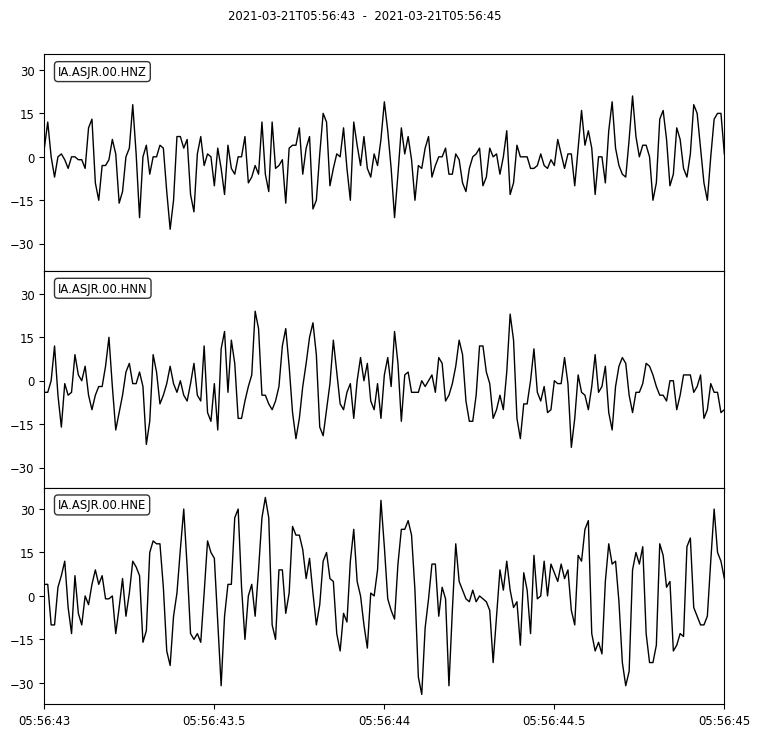

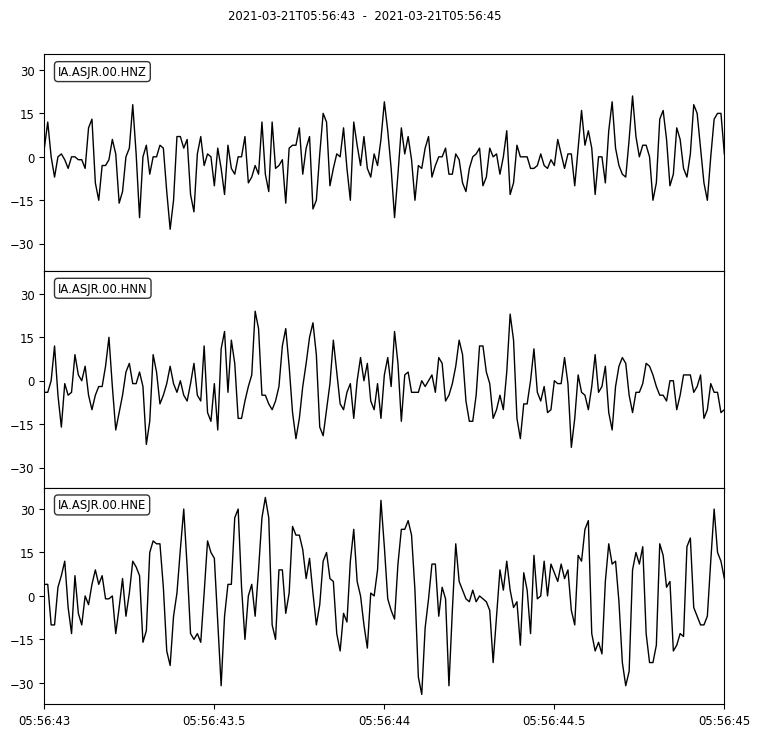

In [16]:
st_trim.trim(starttime, endtime)
st_trim.plot()

### 3.2 Mengaplikasikan filter (*Filtering*)

Sama seperti pada proses *trim* kita juga dapat melihat petunjuk penggunaan `filter`:

In [17]:
help(st.filter)

Help on method filter in module obspy.core.stream:

filter(type, **options) method of obspy.core.stream.Stream instance
    Filter the data of all traces in the Stream.
    
    :type type: str
    :param type: String that specifies which filter is applied (e.g.
        ``"bandpass"``). See the `Supported Filter`_ section below for
        further details.
    :param options: Necessary keyword arguments for the respective filter
        that will be passed on. (e.g. ``freqmin=1.0``, ``freqmax=20.0`` for
        ``"bandpass"``)
    
    .. note::
    
        This operation is performed in place on the actual data arrays. The
        raw data is not accessible anymore afterwards. To keep your
        original data, use :meth:`~obspy.core.stream.Stream.copy` to create
        a copy of your stream object.
        This also makes an entry with information on the applied processing
        in ``stats.processing`` of every trace.
    
    .. rubric:: _`Supported Filter`
    
    ``'bandpass

Contoh untuk filter *highpass* dapat dilakukan dengan:

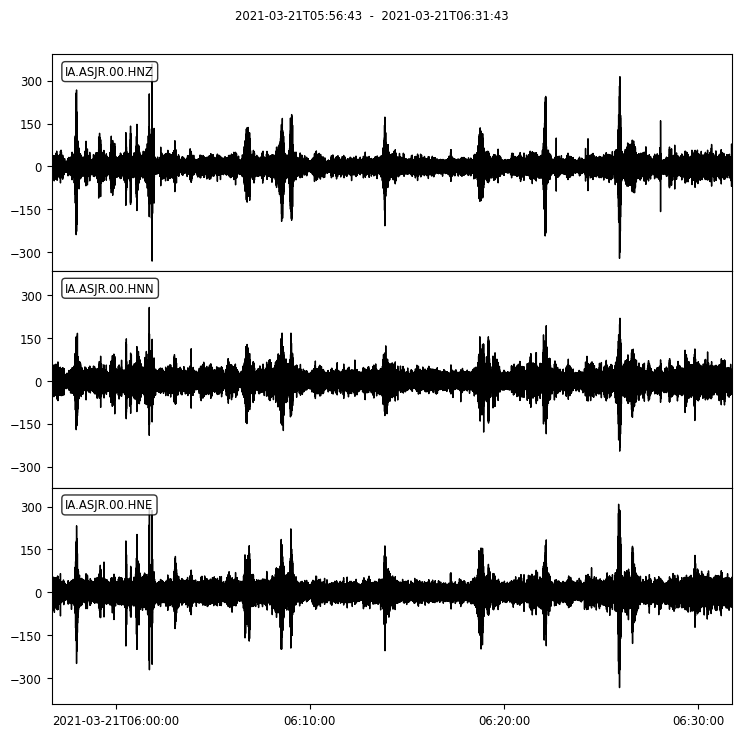

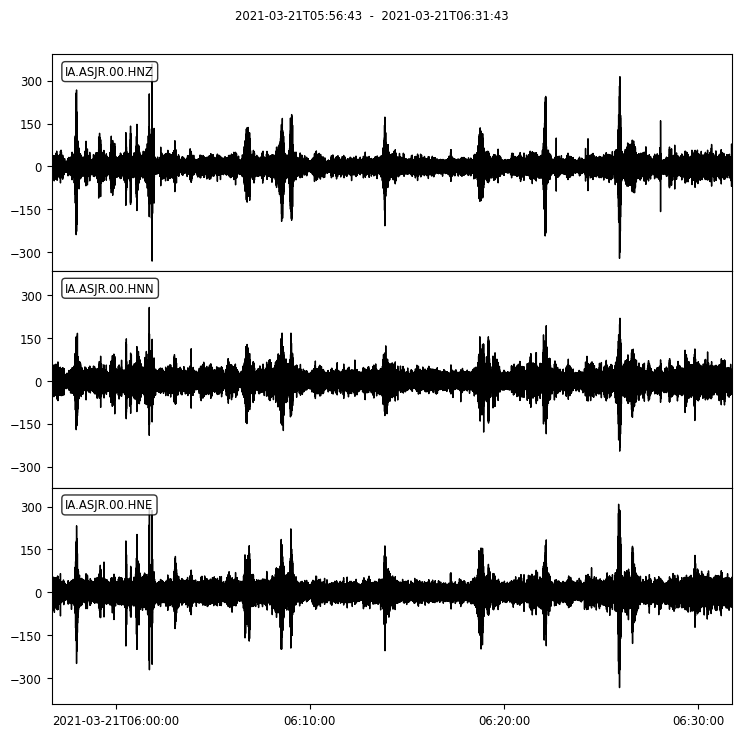

In [18]:
st_filt = st.copy()

st_filt.filter("highpass", freq=1)
st_filt.plot()

### 3.3 Melakukan *Resampling*

*Resampling* dapat dilakukan dengan menggunakan fungsi `resample`:


3 Trace(s) in Stream:
IA.ASJR.00.HNZ | 2021-03-21T05:56:43.000000Z - 2021-03-21T06:31:42.950000Z | 20.0 Hz, 42000 samples
IA.ASJR.00.HNN | 2021-03-21T05:56:43.000000Z - 2021-03-21T06:31:42.950000Z | 20.0 Hz, 42000 samples
IA.ASJR.00.HNE | 2021-03-21T05:56:43.000000Z - 2021-03-21T06:31:42.950000Z | 20.0 Hz, 42000 samples


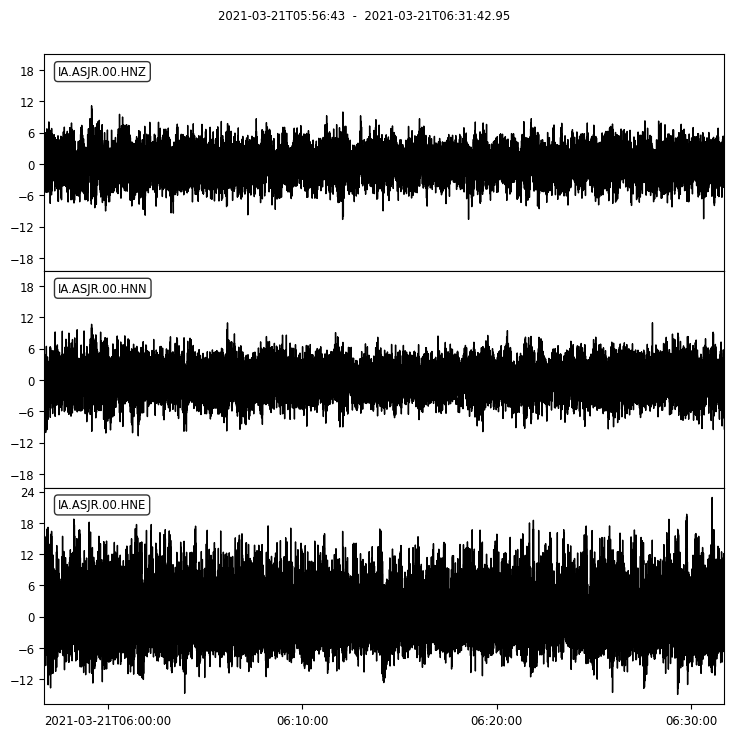

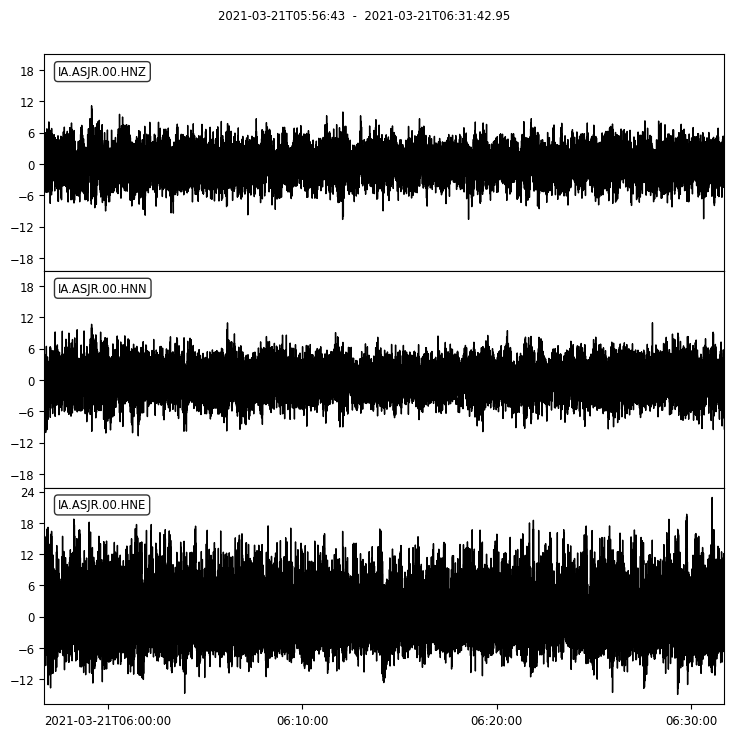

In [19]:
st_resamp = st.copy()
st_resamp.resample(sampling_rate=20)
print(st_resamp)
st_resamp.plot()

### 3.4 Menghilangkan *trend*

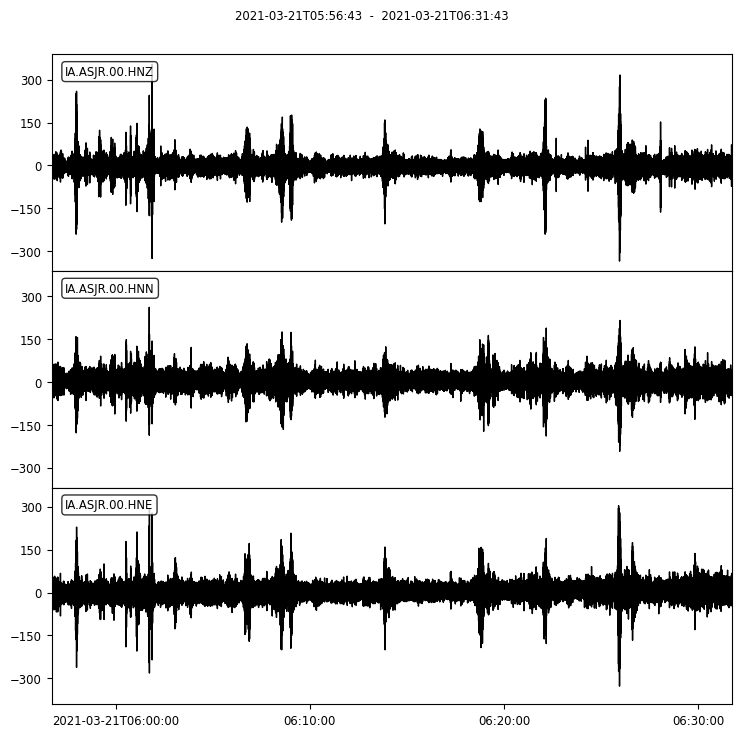

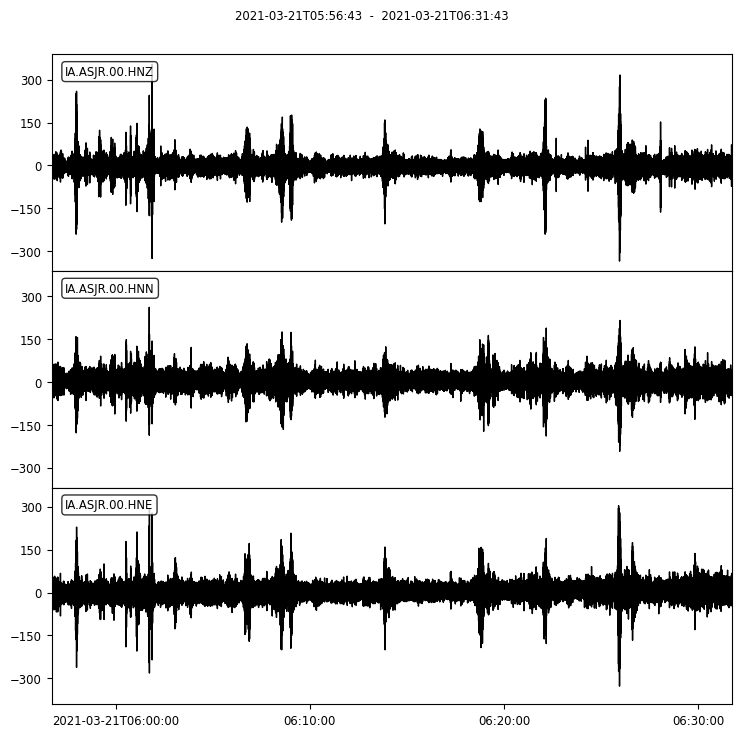

In [20]:
st_detrend = st.copy()
st_detrend.detrend()
st_detrend.plot()

### 3.5 Mengeplot spectogram

`obspy` juga memungkinkan pengeplotan spectrogram dengan perintah yang sederhana. Misalkan kita ingin mengeplot spectrogram pada data yang sudah difilter:

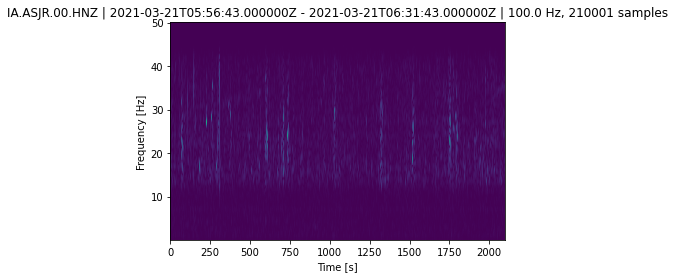

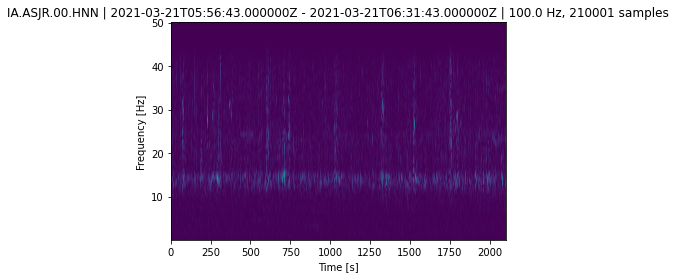

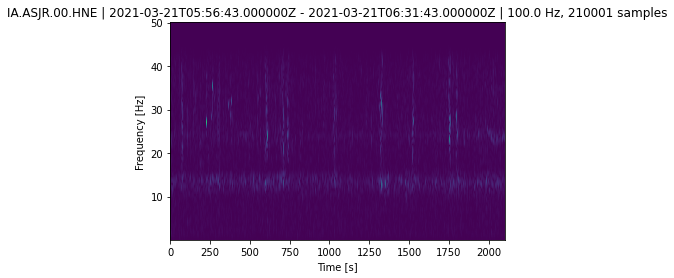

[None, None, None]

In [21]:
st_filt.spectrogram()

## 4 Menyimpan Data

Setelah berbagai pengolahan, `obspy` juga memberikan dukungan untuk menyimpan data dengan berbagai format, pada contoh disini data yang sudah difilter akan disimpan ke dalam file menggunakan `Stream.write`:

In [24]:
st_filt.write("data_terfilter.mseed")

/usr/local/lib/python3.7/dist-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


Data yang sudah disimpan akan masuk di File Explorer Colab dan dapat diunduh.

## 5 Latihan

### 5.1 Membaca data seismik BLJR

In [27]:
st=read('isikan lokasi BLJR Z')
st+=read('isikan lokasi BLJR N')
st+=read('isikan lokasi BLJR E')
print(st)

FileNotFoundError: ignored

### 5.2 Mengeplot data seismik BLJR

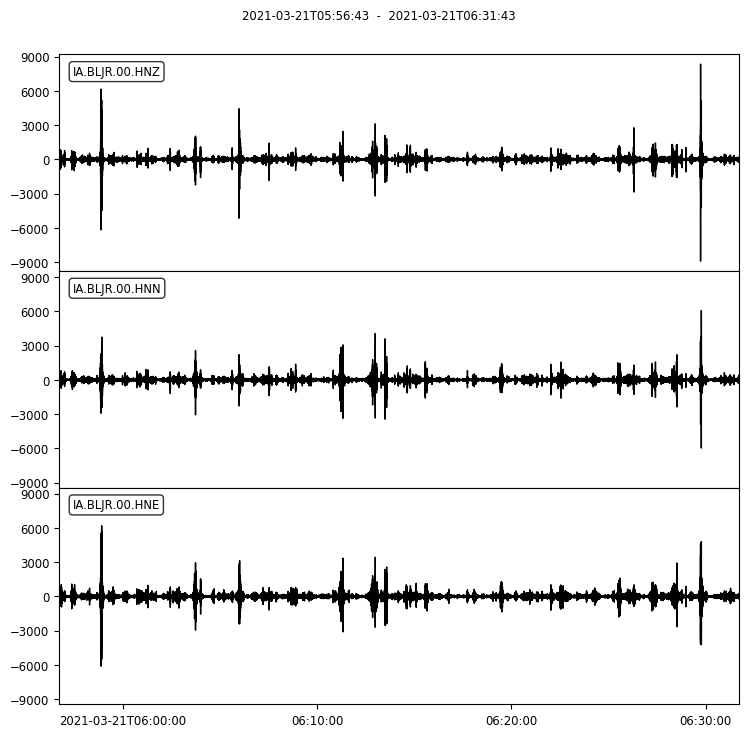

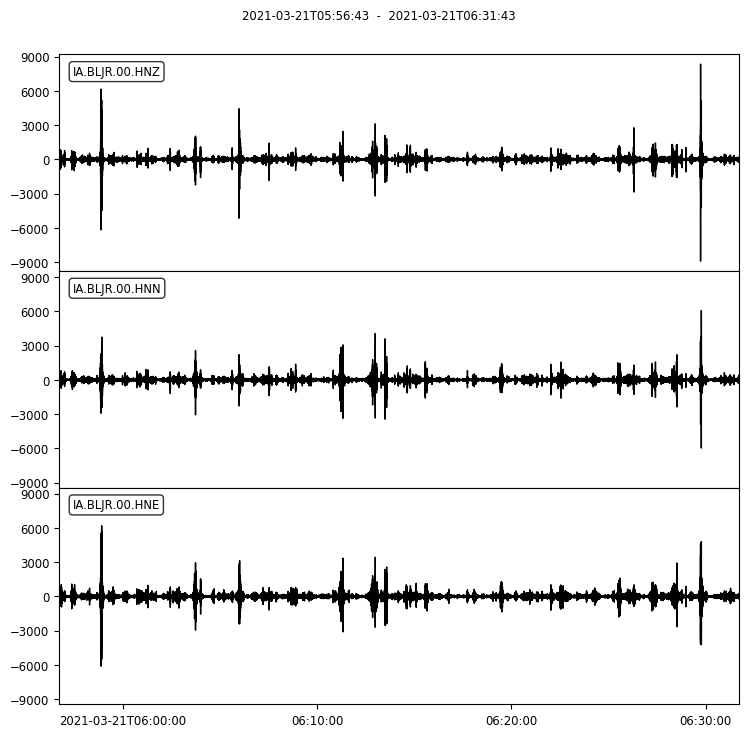

In [23]:
# masukkan kode untuk mengeplot

### 5.3 Melakukan *Filtering*

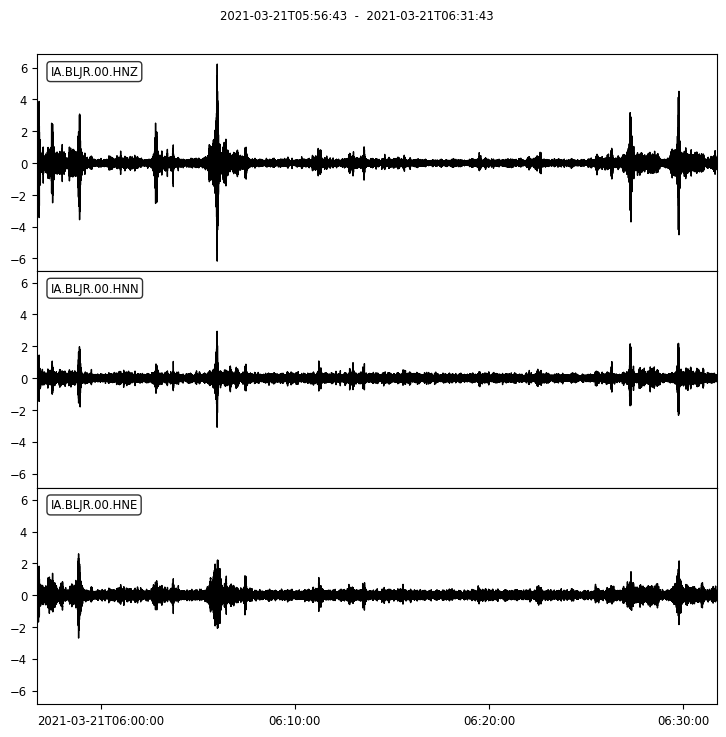

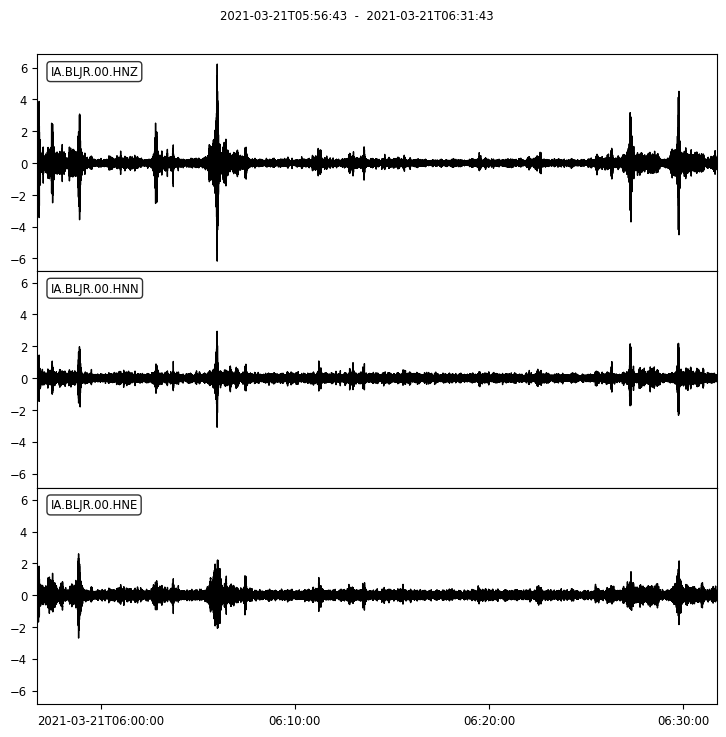

In [28]:
# lakukan filter lowpass 5 hz dan plot

### 5.4 Menyimpan data

In [29]:
# simpan data ke dalam file dengan write